# Objekterkennung
In dieser Vorlesung wird zunächst die Klassifikation von Bildern mithilfe von Neuronalen Netzen am Beispiel des MNIST-Datensatzes vorgestellt. In einer gemeinsamen Übung wird das Wissen auf die Klassifikation von Verkehrszeichen übertragen. 

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import pickle
import os
import cv2 as cv

## MNIST Klassifikation
In diesem ersten Beispiel geht es darum, handschriftlich geschriebene Zahlen auf Bildern zu erkennen. 
[Link](https://keras.io/examples/vision/mnist_convnet/)

11493376/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Trainingsdaten:


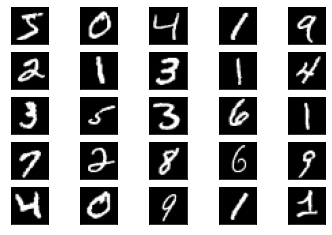

[[5. 0. 4. 1. 9.]
 [2. 1. 3. 1. 4.]
 [3. 5. 3. 6. 1.]
 [7. 2. 8. 6. 9.]
 [4. 0. 9. 1. 1.]]

Testdaten:


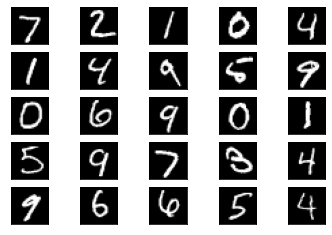

[[7. 2. 1. 0. 4.]
 [1. 4. 9. 5. 9.]
 [0. 6. 9. 0. 1.]
 [5. 9. 7. 3. 4.]
 [9. 6. 6. 5. 4.]]



In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print('Trainingsdaten:')
vis_rows = 5
vis_cols = 5
labels = np.zeros(shape=[vis_rows, vis_cols])
plt.figure()
for i in range(vis_rows): 
    for j in range(vis_cols):
        plt.subplot(vis_rows, vis_cols, (i*vis_rows + j) + 1); plt.xticks([]); plt.yticks([])
        plt.imshow(x_train[i*vis_rows + j], cmap='gray')
        labels[i,j] = int(np.dot(y_train[i*vis_rows + j], np.array([0,1,2,3,4,5,6,7,8,9])))
plt.show()
print(labels)
print('')

print('Testdaten:')
vis_rows = 5
vis_cols = 5
plt.figure()
for i in range(vis_rows): 
    for j in range(vis_cols):
        plt.subplot(vis_rows, vis_cols, (i*vis_rows + j) + 1); plt.xticks([]); plt.yticks([])
        plt.imshow(x_test[i*vis_rows + j], cmap='gray')
        labels[i,j] = int(np.dot(y_test[i*vis_rows + j], np.array([0,1,2,3,4,5,6,7,8,9])))
plt.show()
print(labels)
print('')

In [3]:
# build the model
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [4]:
# train the model
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 14s 32ms/step - loss: 0.3621 - accuracy: 0.8888 - val_loss: 0.0825 - val_accuracy: 0.9772
Epoch 2/15
422/422 [==============================] - 14s 32ms/step - loss: 0.1110 - accuracy: 0.9656 - val_loss: 0.0576 - val_accuracy: 0.9848
Epoch 3/15
422/422 [==============================] - 13s 32ms/step - loss: 0.0848 - accuracy: 0.9734 - val_loss: 0.0474 - val_accuracy: 0.9868
Epoch 4/15
422/422 [==============================] - 14s 33ms/step - loss: 0.0734 - accuracy: 0.9768 - val_loss: 0.0398 - val_accuracy: 0.9892
Epoch 5/15
422/422 [==============================] - 13s 30ms/step - loss: 0.0627 - accuracy: 0.9806 - val_loss: 0.0384 - val_accuracy: 0.9893
Epoch 6/15
422/422 [==============================] - 14s 32ms/step - loss: 0.0567 - accuracy: 0.9825 - val_loss: 0.0364 - val_accuracy: 0.9913
Epoch 7/15
422/422 [==============================] - 13s 31ms/step - loss: 0.0518 - accuracy: 0.9837 - val_loss: 0.0347 - val_accuracy:

In [5]:
# evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
model.save('./model_mnist')
print("Model saved")
#model2 = keras.models.load_model('./model_mnist')

Test loss: 0.023764099925756454
Test accuracy: 0.9922999739646912
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./model_mnist\assets
Model saved


In [6]:
idx_to_test = 4
print('Prediction: ', np.argmax(model.predict(x_test[idx_to_test].reshape(-1, 28, 28, 1))))
print('Label: ', int(np.dot(y_test[idx_to_test], np.array([0,1,2,3,4,5,6,7,8,9]))))

Prediction:  4
Label:  4


# Transfer Learning: Anwendung der Netzstruktur für Verkehrszeichen (Aufgabe)

## Lade Datensatz

In [28]:
# Udacity Link to German traffic sign dataset: 
# https://s3-us-west-1.amazonaws.com/udacity-selfdrivingcar/traffic-signs-data.zip
# traffic-signs-data
training_file = './img/traffic_signs/train.p'
validation_file = '././img/traffic_signs/valid.p'
testing_file = './img/traffic_signs/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_valid)))
print("Test Set:       {} samples".format(len(X_test)))


Image Shape: (32, 32, 3)

Training Set:   34799 samples
Validation Set: 4410 samples
Test Set:       12630 samples


Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
Exploration of data:


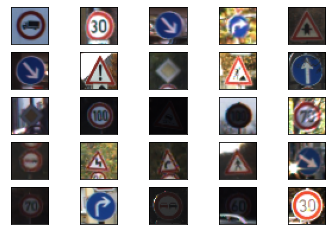

[[16.  1. 38. 33. 11.]
 [38. 18. 12. 25. 35.]
 [12.  7. 23.  7.  4.]
 [ 9. 21. 20. 27. 38.]
 [ 4. 33.  9.  3.  1.]]



In [29]:
n_train = len(X_train)                  # Number of training examples
n_validation = len(X_valid)             # Number of validation examples
n_test = len(X_test)                    # Number of testing examples.
image_shape = X_test[0].shape           # What's the shape of an traffic sign image?
n_classes = len(np.unique(y_train))     # How many unique classes/labels there are in the dataset.
labels = np.zeros(shape=[vis_rows, vis_cols])

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

y_train_cat = keras.utils.to_categorical(y_train, num_classes)
y_test_cat = keras.utils.to_categorical(y_test, num_classes)
y_valid_cat = keras.utils.to_categorical(y_valid, num_classes)

print('Exploration of data:')
vis_rows = 5
vis_cols = 5
plt.figure()
for i in range(vis_rows): 
    for j in range(vis_cols):
        plt.subplot(vis_rows, vis_cols, (i*vis_rows + j) + 1); plt.xticks([]); plt.yticks([])
        plt.imshow(X_test[i*vis_rows + j], cmap='gray')
        labels[i,j] = y_test[i*vis_rows + j]
plt.show()
print(labels)
print('')

In [30]:
def prepare_images(X_img):
    X_img_norm = X_img.copy()
    X_img_norm = cv.cvtColor(X_img.reshape(-1,32,3), cv.COLOR_RGB2YCrCb)[:,:,0]
    clahe = cv.createCLAHE(clipLimit=2.5, tileGridSize=(16,16))
    X_img_norm = clahe.apply(X_img_norm)
    X_img_norm = X_img_norm.reshape(int(X_img_norm.shape[0]/32), 32, 32, 1)

    # center pixel values
    X_img_norm = (X_img_norm - 128.0) / 128   

    return X_img_norm 

# image preprocessing
X_train_norm = prepare_images(X_train)
X_test_norm = prepare_images(X_test)
X_valid_norm = prepare_images(X_valid)

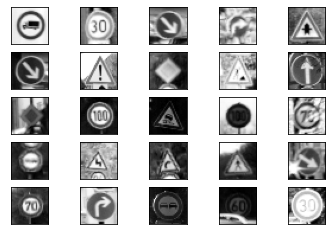

[[16.  1. 38. 33. 11.]
 [38. 18. 12. 25. 35.]
 [12.  7. 23.  7.  4.]
 [ 9. 21. 20. 27. 38.]
 [ 4. 33.  9.  3.  1.]]



In [31]:
plt.figure()
for i in range(vis_rows): 
    for j in range(vis_cols):
        plt.subplot(vis_rows, vis_cols, (i*vis_rows + j) + 1); plt.xticks([]); plt.yticks([])
        plt.imshow(X_test_norm[i*vis_rows + j], cmap='gray')
        labels[i,j] = y_test[i*vis_rows + j]
plt.show()
print(labels)
print('')

In [32]:
# Model / data parameters
num_classes = 43
input_shape = (32, 32, 1)

# build the model
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model = keras.models.load_model('./model_TS')

model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 2304)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 43)               

In [25]:
# train the model
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(X_train_norm, y_train_cat, batch_size=batch_size, epochs=epochs, validation_split=0.1)

model.save('./model_ts')

Epoch 1/15
245/245 [==============================] - 11s 45ms/step - loss: 1.6325 - accuracy: 0.5647 - val_loss: 26.0889 - val_accuracy: 0.0330
Epoch 2/15
245/245 [==============================] - 11s 44ms/step - loss: 0.3473 - accuracy: 0.9033 - val_loss: 31.7730 - val_accuracy: 0.0287
Epoch 3/15
245/245 [==============================] - 10s 42ms/step - loss: 0.1924 - accuracy: 0.9475 - val_loss: 33.0134 - val_accuracy: 0.0342
Epoch 4/15
245/245 [==============================] - 10s 41ms/step - loss: 0.1357 - accuracy: 0.9631 - val_loss: 36.1632 - val_accuracy: 0.0333
Epoch 5/15
245/245 [==============================] - 11s 44ms/step - loss: 0.1034 - accuracy: 0.9718 - val_loss: 37.5697 - val_accuracy: 0.0264
Epoch 6/15
245/245 [==============================] - 10s 40ms/step - loss: 0.0860 - accuracy: 0.9765 - val_loss: 39.0054 - val_accuracy: 0.0279
Epoch 7/15
245/245 [==============================] - 10s 40ms/step - loss: 0.0731 - accuracy: 0.9799 - val_loss: 41.0802 - val_ac

In [33]:
score = model.evaluate(X_test_norm, y_test_cat, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

y_valid_cat = keras.utils.to_categorical(y_valid, num_classes)
score = model.evaluate(X_valid_norm, y_valid_cat, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

idx_to_test = 2
print('Prediction: ', np.argmax(model.predict(X_test_norm[idx_to_test].reshape(-1, 32, 32, 1))))
print('Label: ', y_test[idx_to_test])

Test loss: 5.391700267791748
Test accuracy: 0.8383214473724365
Test loss: 4.825751781463623
Test accuracy: 0.866439938545227
Prediction:  38
Label:  38
